In [1]:
import glob
import numpy as np
import datetime as dt
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
company_name = {
    "CFG": "",
    "FHN": "",
    "SF": "",
    "IBKR": "",
    "ALLY": "",
    "WFC": "",
    "C": "Citigroup",
    "BAC": "",
    "FRC": "",
    "JPM": "",
    "DCOM": "",
    "PEBO": "",
    "SBNY": "",
    "FNB": "",
    "OCFC": "",
    "MSFT": "",
    "NVDA": "",
    "FB": "",
    "GOOGL": "Google",
    "AAPL": "",
    "NVS": "",
    "AZN": "",
    "MRNA": "",
    "PFE": "",
    "JNJ": ""
}

In [3]:
large_cap = pd.DataFrame()

for path in glob.glob("Data/*/Large-Cap/*.csv"):
    print(path)
    sector = path.split("/")[1]
    cap = path.split("/")[2]
    company = path.split("/")[3].split(".")[0]
    
    newdf = pd.read_csv(path, usecols=["Close","Date"], index_col =["Date"], infer_datetime_format= True, parse_dates= True)
    
    lendf = len(newdf)
    newdf["Sector"] = [sector] * lendf
    newdf["Cap"] = [cap] * lendf
    newdf["Company"] = [company] * lendf
    large_cap = pd.concat([large_cap, newdf], axis=0)

print(large_cap.shape)
large_cap.head()

Data/Technology/Large-Cap/MSFT.csv
Data/Technology/Large-Cap/NVDA.csv
Data/Technology/Large-Cap/FB.csv
Data/Technology/Large-Cap/GOOGL.csv
Data/Technology/Large-Cap/AAPL.csv
Data/Healthcare/Large-Cap/NVS.csv
Data/Healthcare/Large-Cap/AZN.csv
Data/Healthcare/Large-Cap/MRNA.csv
Data/Healthcare/Large-Cap/PFE.csv
Data/Healthcare/Large-Cap/JNJ.csv
Data/Banking/Large-Cap/C.csv
Data/Banking/Large-Cap/BAC.csv
Data/Banking/Large-Cap/FRC.csv
Data/Banking/Large-Cap/WFC.csv
Data/Banking/Large-Cap/JPM.csv
(6285, 4)


,Close,Sector,Cap,Company
Date,,,,
2019-12-02,149.550003,Technology,Large-Cap,MSFT
2019-12-03,149.309998,Technology,Large-Cap,MSFT
2019-12-04,149.850006,Technology,Large-Cap,MSFT
2019-12-05,149.929993,Technology,Large-Cap,MSFT
2019-12-06,151.750000,Technology,Large-Cap,MSFT


In [4]:
large_cap["Sector"].value_counts()

Banking       2095
Technology    2095
Healthcare    2095
Name: Sector, dtype: int64

In [5]:
large_cap[["Sector","Company"]].value_counts()

Sector      Company
Banking     BAC        419
            C          419
            FRC        419
            JPM        419
            WFC        419
Healthcare  AZN        419
            JNJ        419
            MRNA       419
            NVS        419
            PFE        419
Technology  AAPL       419
            FB         419
            GOOGL      419
            MSFT       419
            NVDA       419
dtype: int64

### Output 1 -> Average returns of each sector for large-cap

In [6]:
large_cap.head()

,Close,Sector,Cap,Company
Date,,,,
2019-12-02,149.550003,Technology,Large-Cap,MSFT
2019-12-03,149.309998,Technology,Large-Cap,MSFT
2019-12-04,149.850006,Technology,Large-Cap,MSFT
2019-12-05,149.929993,Technology,Large-Cap,MSFT
2019-12-06,151.750000,Technology,Large-Cap,MSFT


In [7]:
large_cap.drop(columns=["Cap"], inplace=True)

In [8]:
large_cap_pivot = pd.pivot_table(large_cap, values="Close", index="Date", columns=["Sector", "Company"])
large_cap_pivot.head()

Sector        Banking                                                \
Company           BAC          C         FRC         JPM        WFC   
Date                                                                  
2019-12-02  33.430000  74.519997  110.070000  131.470001  53.619999   
2019-12-03  32.840000  73.330002  109.070000  129.779999  52.580002   
2019-12-04  33.150002  74.230003  110.260002  132.339996  53.240002   
2019-12-05  33.090000  74.709999  110.970001  133.059998  53.230000   
2019-12-06  33.669998  75.809998  112.529999  135.039993  54.369999   

Sector     Healthcare                                              Technology  \
Company           AZN         JNJ       MRNA        NVS        PFE       AAPL   
Date                                                                            
2019-12-02  48.380001  137.360001  19.760000  91.430000  36.328274  66.040001   
2019-12-03  47.889999  137.160004  21.280001  91.019997  36.100571  64.862503   
2019-12-04  48.200001  139.380005  21.270000  91.559998  36.185959  65.434998   
2019-12-05  47.619999  139.559998  20.639999  91.639999  36.081593  66.394997   
2019-12-06  47.680000  140.380005  18.940001  92.070000  36.328274  67.677498   

Sector                                                      
Company             FB        GOOGL        MSFT       NVDA  
Date                                                        
2019-12-02  199.699997  1288.859985  149.550003  52.312500  
2019-12-03  198.820007  1294.739990  149.309998  51.915001  
2019-12-04  198.710007  1318.939941  149.850006  52.355000  
2019-12-05  199.360001  1326.959961  149.929993  52.185001  
2019-12-06  201.050003  1339.390015  151.750000  53.042500

In [9]:
large_cap_returns = large_cap_pivot.pct_change()
print(large_cap_returns.shape)
large_cap_returns.head()

(419, 15)


Sector       Banking                                         Healthcare  \
Company          BAC         C       FRC       JPM       WFC        AZN   
Date                                                                      
2019-12-02       NaN       NaN       NaN       NaN       NaN        NaN   
2019-12-03 -0.017649 -0.015969 -0.009085 -0.012855 -0.019396  -0.010128   
2019-12-04  0.009440  0.012273  0.010910  0.019726  0.012552   0.006473   
2019-12-05 -0.001810  0.006466  0.006439  0.005441 -0.000188  -0.012033   
2019-12-06  0.017528  0.014724  0.014058  0.014880  0.021416   0.001260   

Sector                                             Technology            \
Company          JNJ      MRNA       NVS       PFE       AAPL        FB   
Date                                                                      
2019-12-02       NaN       NaN       NaN       NaN        NaN       NaN   
2019-12-03 -0.001456  0.076923 -0.004484 -0.006268  -0.017830 -0.004407   
2019-12-04  0.016185 -0.000470  0.005933  0.002365   0.008826 -0.000553   
2019-12-05  0.001291 -0.029619  0.000874 -0.002884   0.014671  0.003271   
2019-12-06  0.005876 -0.082364  0.004692  0.006837   0.019316  0.008477   

Sector                                    
Company        GOOGL      MSFT      NVDA  
Date                                      
2019-12-02       NaN       NaN       NaN  
2019-12-03  0.004562 -0.001605 -0.007599  
2019-12-04  0.018691  0.003617  0.008475  
2019-12-05  0.006081  0.000534 -0.003247  
2019-12-06  0.009367  0.012139  0.016432

In [10]:
large_cap_returns.dropna(inplace=True)
print(large_cap_returns.shape)

(418, 15)


In [11]:
large_cap_returns.head(2)

Sector       Banking                                         Healthcare  \
Company          BAC         C       FRC       JPM       WFC        AZN   
Date                                                                      
2019-12-03 -0.017649 -0.015969 -0.009085 -0.012855 -0.019396  -0.010128   
2019-12-04  0.009440  0.012273  0.010910  0.019726  0.012552   0.006473   

Sector                                             Technology            \
Company          JNJ      MRNA       NVS       PFE       AAPL        FB   
Date                                                                      
2019-12-03 -0.001456  0.076923 -0.004484 -0.006268  -0.017830 -0.004407   
2019-12-04  0.016185 -0.000470  0.005933  0.002365   0.008826 -0.000553   

Sector                                    
Company        GOOGL      MSFT      NVDA  
Date                                      
2019-12-03  0.004562 -0.001605 -0.007599  
2019-12-04  0.018691  0.003617  0.008475

In [12]:
large_cap_returns = large_cap_returns.reset_index(drop=False)
large_cap_returns.head()

Sector        Date   Banking                                          \
Company                  BAC         C       FRC       JPM       WFC   
0       2019-12-03 -0.017649 -0.015969 -0.009085 -0.012855 -0.019396   
1       2019-12-04  0.009440  0.012273  0.010910  0.019726  0.012552   
2       2019-12-05 -0.001810  0.006466  0.006439  0.005441 -0.000188   
3       2019-12-06  0.017528  0.014724  0.014058  0.014880  0.021416   
4       2019-12-09 -0.004752 -0.006332  0.002222 -0.004665 -0.008277   

Sector  Healthcare                                         Technology  \
Company        AZN       JNJ      MRNA       NVS       PFE       AAPL   
0        -0.010128 -0.001456  0.076923 -0.004484 -0.006268  -0.017830   
1         0.006473  0.016185 -0.000470  0.005933  0.002365   0.008826   
2        -0.012033  0.001291 -0.029619  0.000874 -0.002884   0.014671   
3         0.001260  0.005876 -0.082364  0.004692  0.006837   0.019316   
4         0.001888  0.000855 -0.008448  0.004996  0.000783  -0.014000   

Sector                                           
Company        FB     GOOGL      MSFT      NVDA  
0       -0.004407  0.004562 -0.001605 -0.007599  
1       -0.000553  0.018691  0.003617  0.008475  
2        0.003271  0.006081  0.000534 -0.003247  
3        0.008477  0.009367  0.012139  0.016432  
4        0.001442  0.002688 -0.002570  0.000000

In [13]:
lc_r_unp = large_cap_returns.melt(id_vars=["Date"])
lc_r_unp.head()

,Date,Sector,Company,value
0,2019-12-03,Banking,BAC,-0.017649
1,2019-12-04,Banking,BAC,0.009440
2,2019-12-05,Banking,BAC,-0.001810
3,2019-12-06,Banking,BAC,0.017528
4,2019-12-09,Banking,BAC,-0.004752


In [14]:
lc_r_unp.shape

(6270, 4)

In [15]:
#lc_r_unp.to_csv("Outputs/Large-cap Returns.csv", index=False)

In [16]:
lc_avgr_s = lc_r_unp.groupby(by=["Date", "Sector"]).mean()
print(lc_avgr_s.shape)
lc_avgr_s.head()

(1254, 1)


value
Date       Sector              
2019-12-03 Banking    -0.014991
           Healthcare  0.010917
           Technology -0.005376
2019-12-04 Banking     0.012980
           Healthcare  0.006097

In [17]:
output1 = lc_avgr_s.reset_index(drop=False, level=1)
output1.head()

,Sector,value
Date,,
2019-12-03,Banking,-0.014991
2019-12-03,Healthcare,0.010917
2019-12-03,Technology,-0.005376
2019-12-04,Banking,0.012980
2019-12-04,Healthcare,0.006097


In [18]:
output1 = pd.pivot_table(output1, values="value", index="Date", columns=["Sector"])
output1.head()

Sector,Banking,Healthcare,Technology
Date,,,
2019-12-03,-0.014991,0.010917,-0.005376
2019-12-04,0.012980,0.006097,0.007811
2019-12-05,0.003270,-0.008474,0.004262
2019-12-06,0.016521,-0.012740,0.013146
2019-12-09,-0.004361,0.000015,-0.002488


In [19]:
#output1.plot(figsize=(20,10), title='Daily Returns')

In [20]:
cumulative_returns=(1 + output1).cumprod()
cumulative_returns.head()

Sector,Banking,Healthcare,Technology
Date,,,
2019-12-03,0.985009,1.010917,0.994624
2019-12-04,0.997795,1.017081,1.002394
2019-12-05,1.001058,1.008462,1.006666
2019-12-06,1.017596,0.995614,1.019900
2019-12-09,1.013159,0.995629,1.017362


In [21]:
import datetime

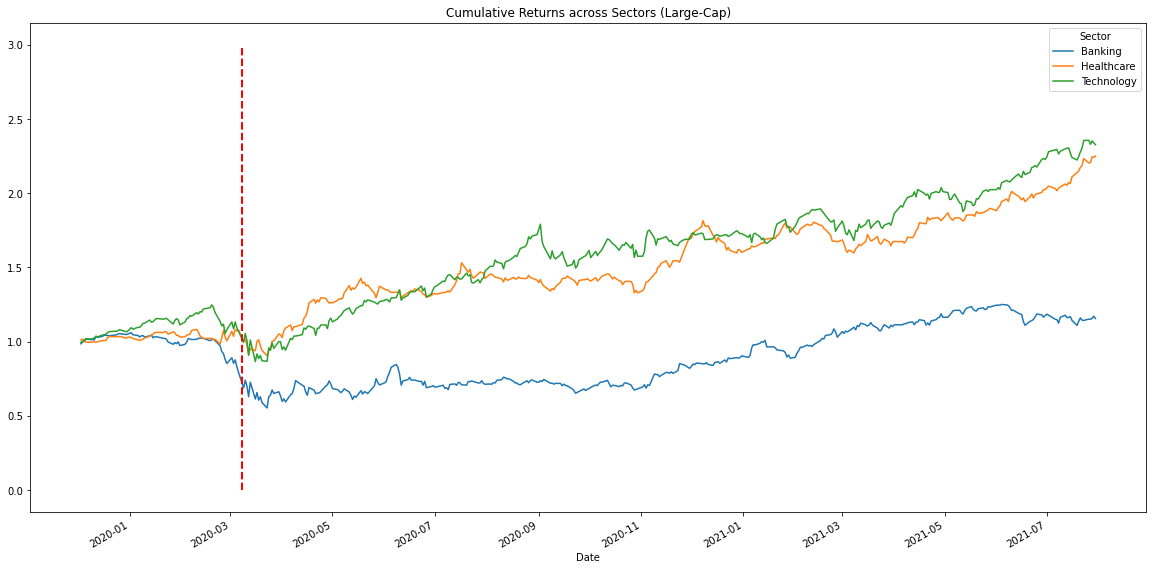

In [31]:
cumulative_returns.plot(figsize=(20,10),title='Cumulative Returns across Sectors (Large-Cap)')
plt.plot([datetime.datetime(2020, 3, 8, 0, 0), datetime.datetime(2020, 3, 8, 0, 0)], [0, 3], 'r-', lw=2, linestyle='dashed')